# visualize risser results

In [5]:
import os
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image
from skimage import io, color
from sklearn import metrics
import seaborn as sns

In [16]:
ddir = r'dataset'
modes = os.listdir(ddir); modes.sort(); print(modes)

['test', 'train', 'val']


In [17]:
mode = 'train'; subset = '4'
idir = os.path.join(ddir, mode, subset)
filenames = os.listdir(idir); filenames.sort()

patient_13.png


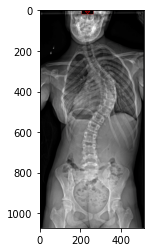

patient_15.png


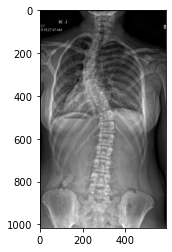

patient_16.png


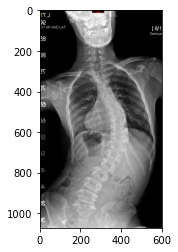

patient_17.png


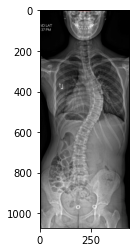

In [19]:
for filename in filenames:
    print(filename)
    filepath = os.path.join(idir, filename)
    raw = Image.open(filepath)
    img = np.array(raw)
    plt.imshow(img, cmap='gray'); plt.show()

### look at CAMs

showing case: patient_14


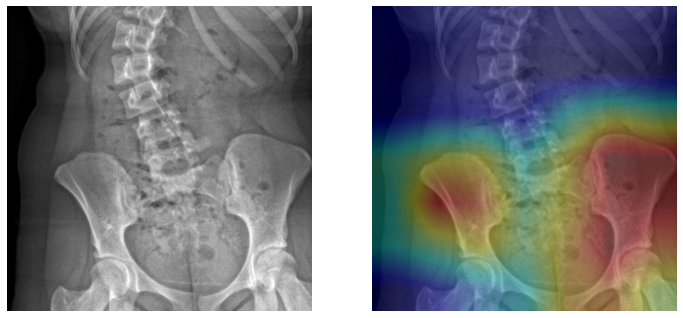

showing case: patient_18


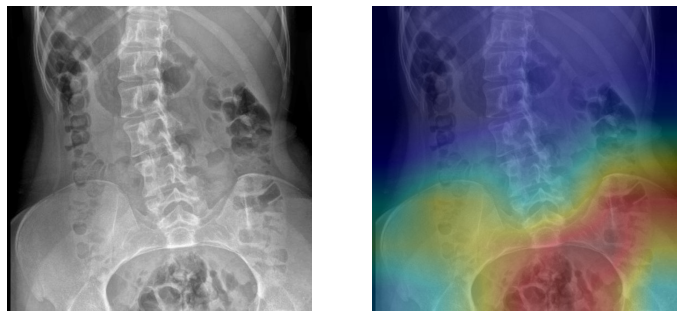

showing case: patient_19


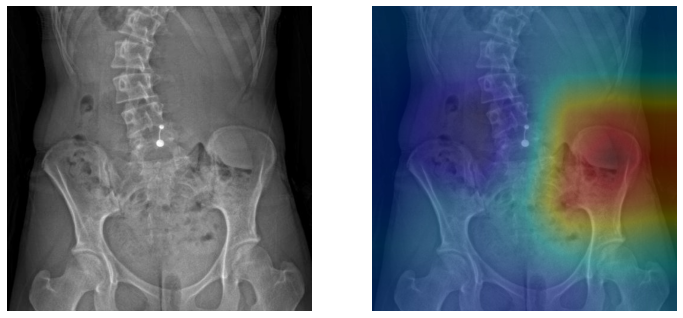

showing case: patient_2


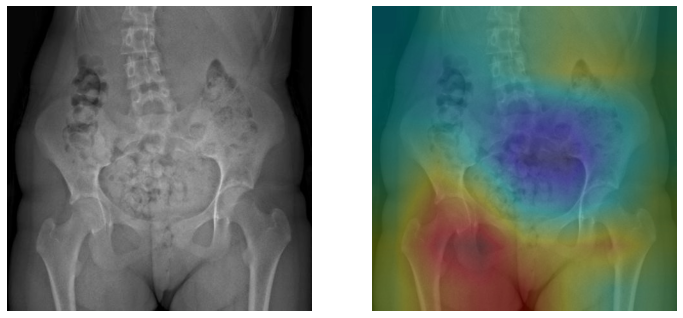

showing case: patient_20


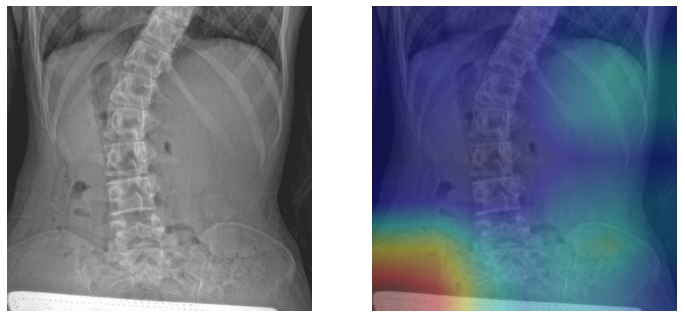

showing case: patient_22


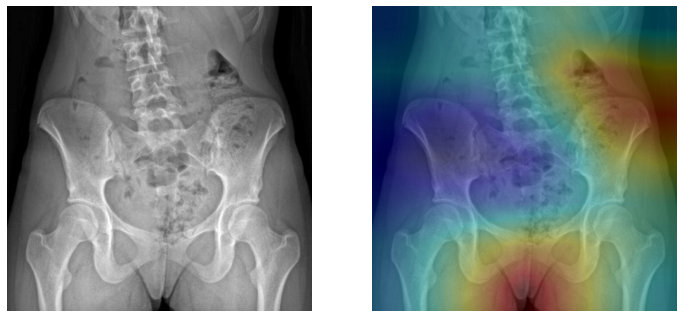

showing case: patient_23


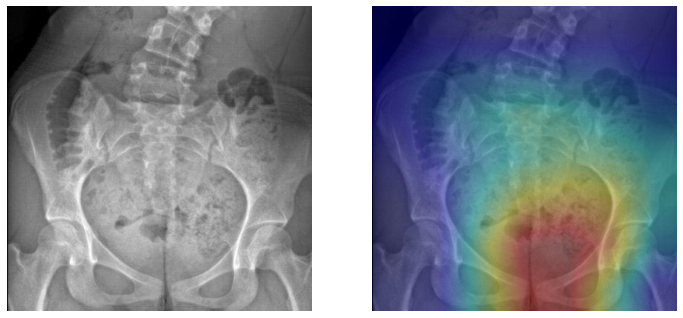

showing case: patient_26


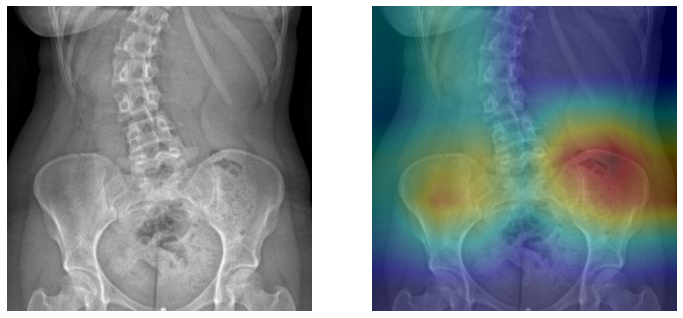

showing case: patient_27


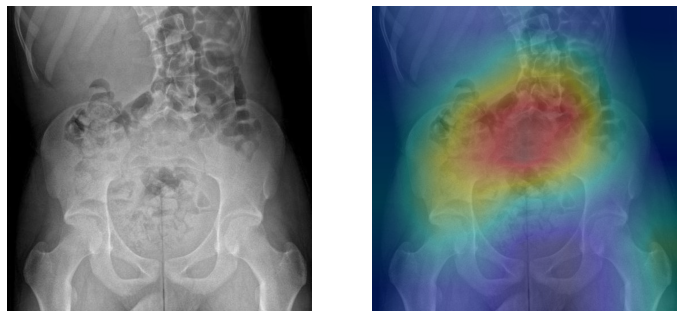

showing case: patient_3


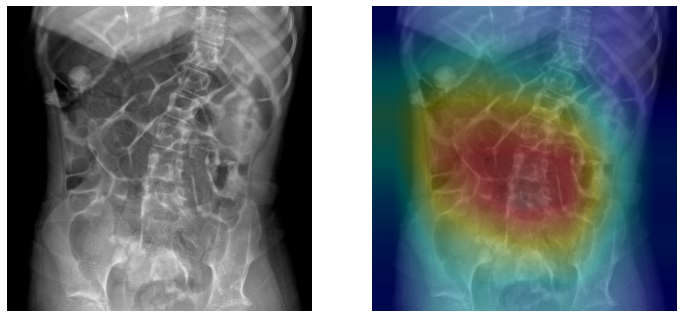

showing case: patient_6


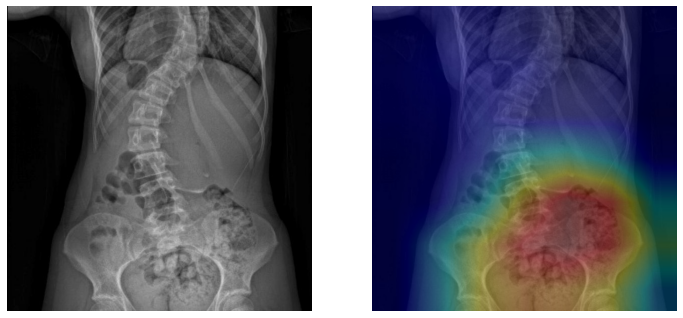

showing case: slide_1


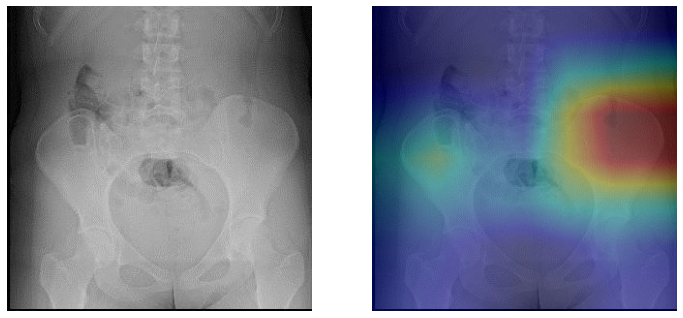

showing case: slide_2


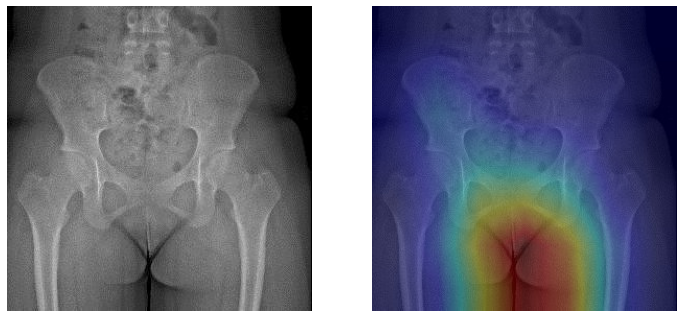

showing case: slide_3


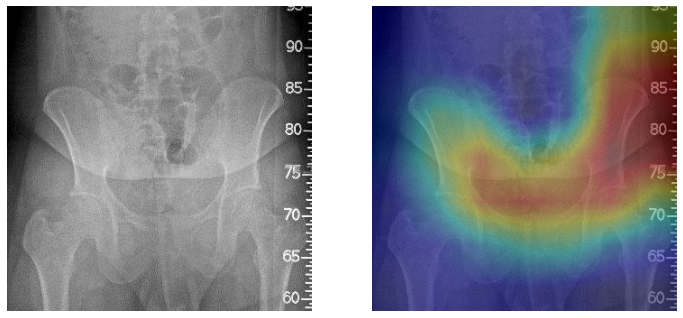

showing case: slide_4


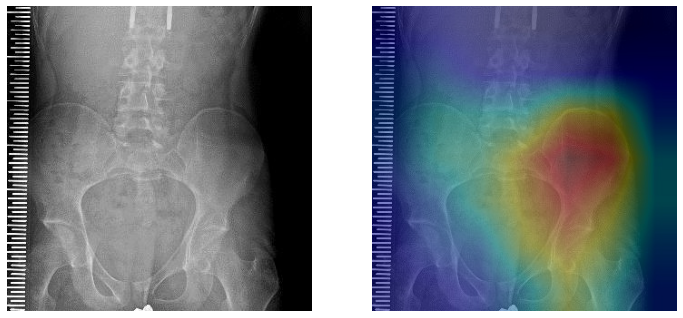

showing case: slide_5


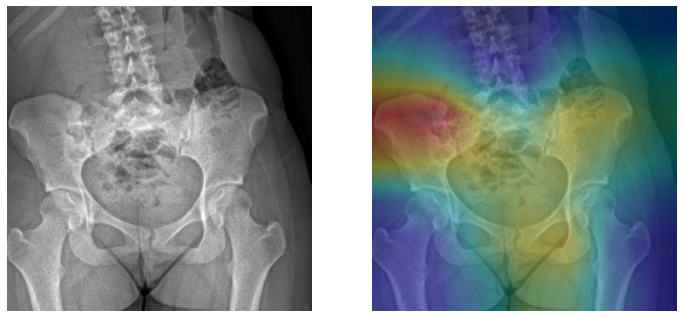

showing case: slide_6


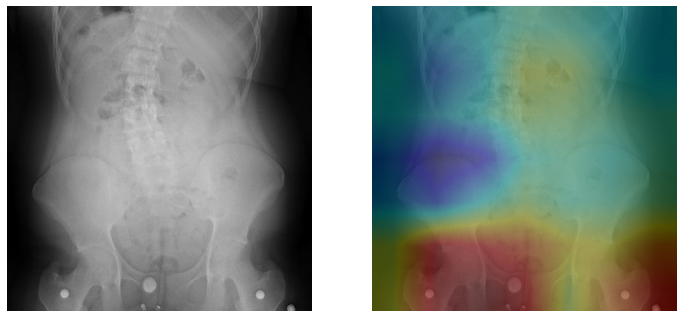

showing case: slide_7


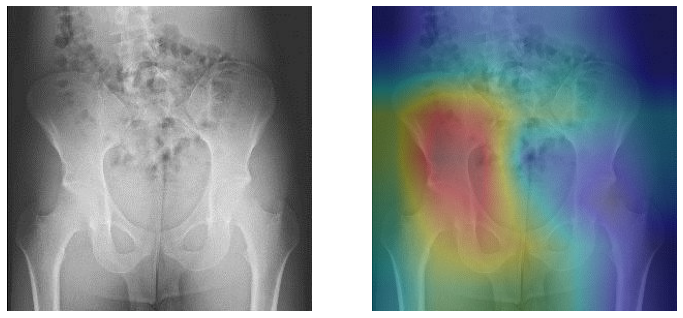

showing case: slide_8


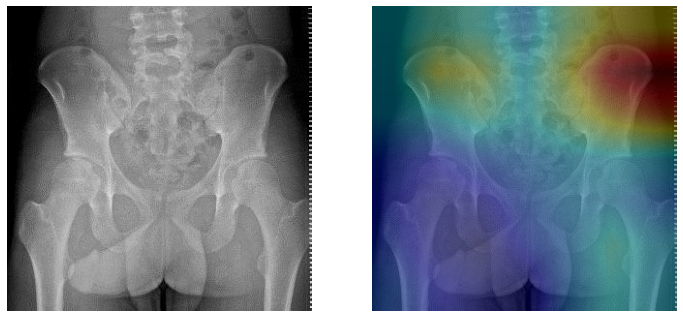

showing case: slide_9


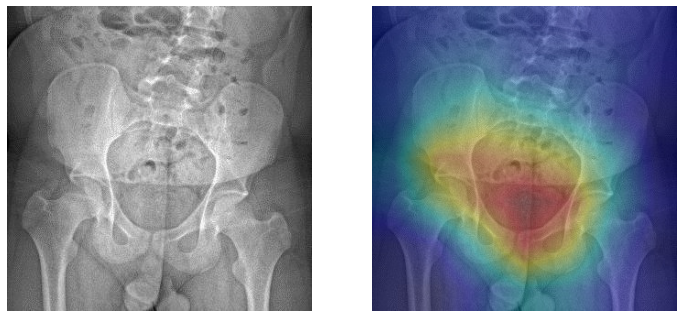

In [4]:
camdir = 'cam'
camfiles = os.listdir(camdir)
camfiles.sort()

patients = []
for camfile in camfiles:
    patient = camfile.split('.')[0]
    if patient.endswith('CAM'):  # only want patient IDs
        continue
    if patient not in patients:
        patients.append(patient)
        
for patient in patients:
    print('showing case:',patient)
    iter_img = io.imread(os.path.join(camdir, patient + '.jpg'))
    iter_cam = io.imread(os.path.join(camdir, patient + '_CAM.jpg'))
    
    plt.figure(figsize=(12,9))
    plt.subplot(1,2,1)
    plt.imshow(iter_img)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(iter_cam)
    plt.axis('off')
    plt.show()

In [2]:
conf_m = [[ 8,  3,  1,  0,  0,  3],
         [ 4,  0,  1,  1,  2,  0],
         [ 2,  2,  1,  0,  4,  2],
         [ 2,  1,  1,  6,  3,  0],
         [ 3,  0,  2,  1, 10,  0],
         [ 2,  0,  0,  0,  5,  8]]

<ipython-input-3-f7649b800f4d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-3-f7649b800f4d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


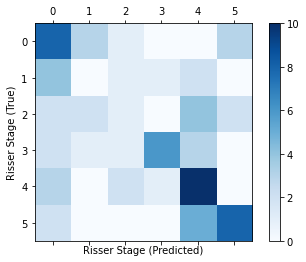

In [3]:
# metrics.plot_confusion_matrix(conf_m)
labels = ['0', '1', '2', '3', '4', '5']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_m, cmap=plt.cm.Blues)
# plt.title('')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Risser Stage (Predicted)')
plt.ylabel('Risser Stage (True)')
plt.show()

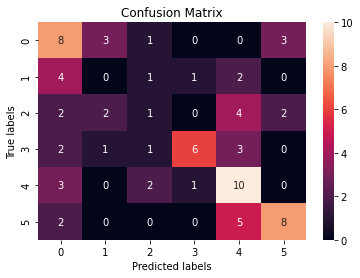

In [6]:
ax = plt.subplot()
sns.heatmap(conf_m, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Risser Stage');ax.set_ylabel('True Risser Stage'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);